# Exploratory Analysis Project

For this project we'll analyze the 911 call dataset from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

# IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = (8, 6)

# DATA 

In [6]:
data = pd.read_csv('911.csv')
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


# Basic analist

Let's check out the top 10 zipcodes for calls.

In [9]:
data['zip'].value_counts().head(10)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
19002.0    21070
19468.0    18939
19046.0    17886
19454.0    17661
19090.0    17377
Name: zip, dtype: int64

The top townships for the calls were as follows:

In [11]:
data['twp'].value_counts().head(10)

LOWER MERION        55490
ABINGTON            39947
NORRISTOWN          37633
UPPER MERION        36010
CHELTENHAM          30574
POTTSTOWN           27387
UPPER MORELAND      22932
LOWER PROVIDENCE    22476
PLYMOUTH            20116
UPPER DUBLIN        18862
Name: twp, dtype: int64

For 90k + entries, how many unique call titles did we have?

In [12]:
data['title'].nunique()

148

# Data feature

We can extract some generalised features from the columns in our dataset for further analysis.


In [13]:
data['Reason'] = data['title'].apply(lambda x: x.split(':')[0])

In [14]:
data.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1,Traffic


Now, let's find out the most common reason for 911 calls, according to our dataset.

In [15]:
data['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reason', ylabel='count'>

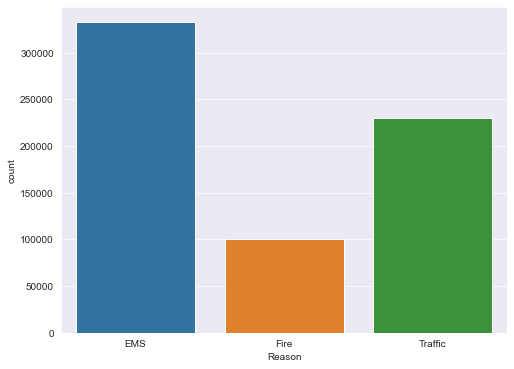

In [16]:
sns.countplot(data['Reason'])

In [17]:
type(data['Reason'][0])

str

In [20]:
# convert it to a python DateTime object
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

For a single DateTime object, we can extract information as follows.

In [22]:
time = data['timeStamp'].iloc[0]

print('Hour:', time.hour)
print('Month:', time.month)
print('Day of Week:', time.dayofweek)

Hour: 17
Month: 12
Day of Week: 3


In [23]:
#Now let's create new features for the above pieces of information.
data['Hour'] = data['timeStamp'].apply(lambda x: x.hour)
data['Month'] = data['timeStamp'].apply(lambda x: x.month)
data['Day of Week'] = data['timeStamp'].apply(lambda x: x.dayofweek)

In [24]:
data.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [25]:
# transform numeric data to the day of week
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [26]:
data['Day of Week'] = data['Day of Week'].map(dmap)

data.tail(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,15,7,Wed
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,15,7,Wed
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,15,7,Wed
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,15,7,Wed
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1,Traffic,15,7,Wed


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


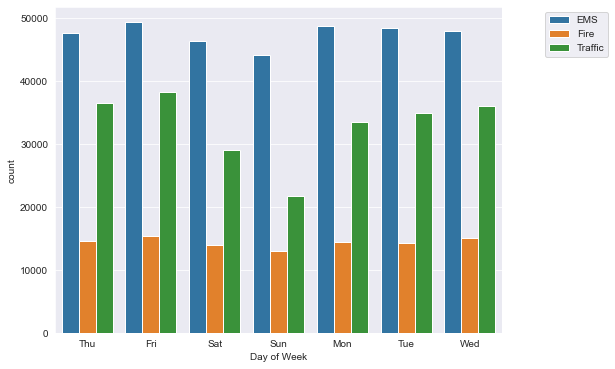

In [27]:
# plot data
sns. countplot(data['Day of Week'], hue = data['Reason'])

plt.legend(bbox_to_anchor=(1.25,1))

It makes sense for the number of traffic related 911 calls to be the lowest during the weekends, what's also iteresting is that Emergency Service related calls are also low during the weekend.

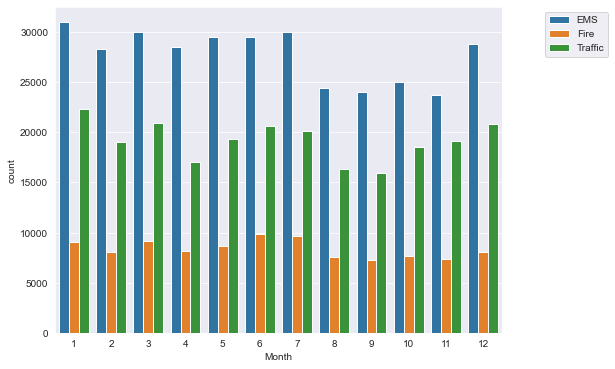

In [28]:
sns.countplot(x=data['Month'], hue=data['Reason'])

plt.legend(bbox_to_anchor=(1.25,1))

Now, let's check out the relationship between the number of calls and the month.

In [29]:
byMonth = data.groupby(by='Month').count()

Text(0, 0.5, 'Number of calls')

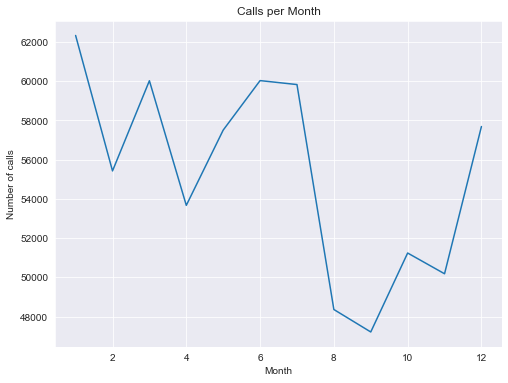

In [31]:
byMonth['e'].plot.line(y='e')
plt.title('Calls per Month')
plt.ylabel('Number of calls')

Using seaborn, let's fit the number of calls to a month and see if there's any concrete correlation between the two.

Text(5.674999999999997, 0.5, 'Number of Calls')

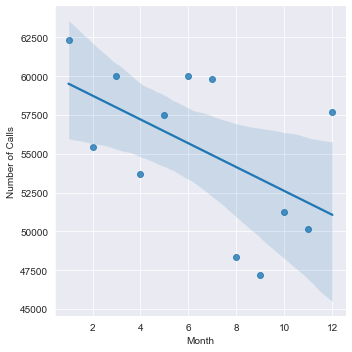

In [33]:
byMonth.reset_index(inplace=True)
sns.lmplot(x='Month', y='e', data=byMonth)
plt.ylabel('Number of Calls')

So, it does seem that there are fewer emergency calls during the holiday seasons.

Let's extract the date from the timestamp, and see behavior in a little more detail.

In [36]:
data['Date'] = data['timeStamp'].apply(lambda x: x.date())
data.tail(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,15,7,Wed,2020-07-29
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,15,7,Wed,2020-07-29
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,15,7,Wed,2020-07-29
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,15,7,Wed,2020-07-29
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1,Traffic,15,7,Wed,2020-07-29


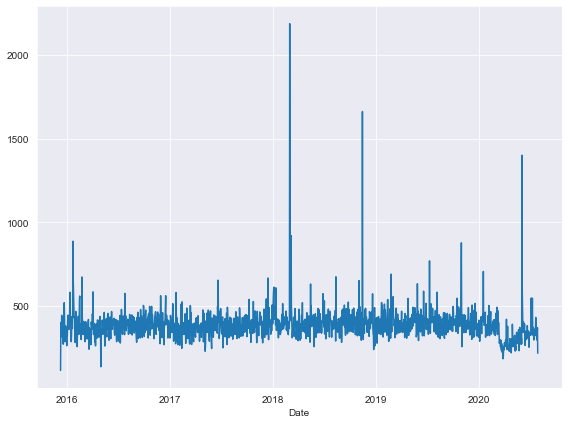

In [41]:
data2 = data.groupby( 'Date').count()['e'].plot.line(y='e')

plt.legend().remove()
plt.tight_layout()

We can also check out the same plot for each reason separately.

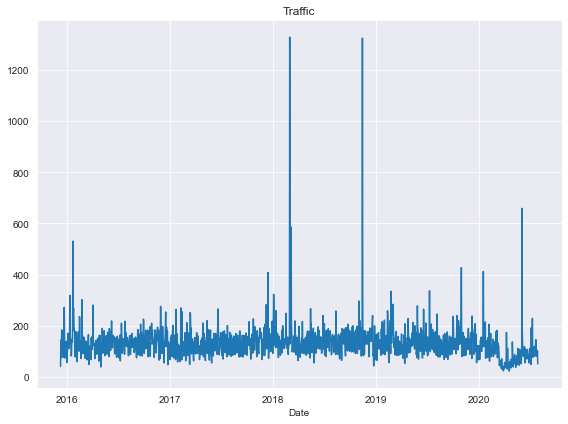

In [45]:
pd.DataFrame.groupby(data[data['Reason']=='Traffic'],'Date').count().plot.line(y='e')
plt.title('Traffic')
plt.legend().remove()
plt.tight_layout()

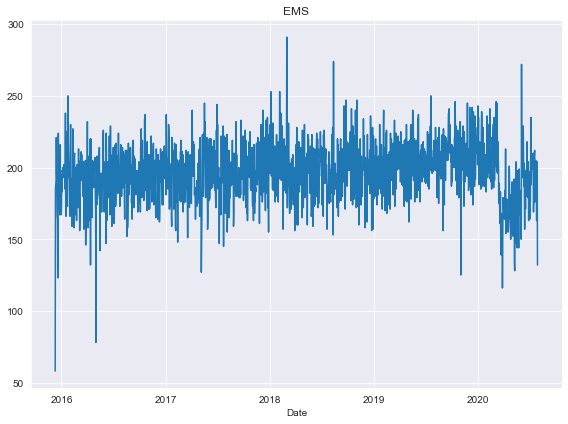

In [46]:
pd.DataFrame.groupby(data[data['Reason']=='EMS'],'Date').count().plot.line(y='e')
plt.title('EMS')
plt.legend().remove()
plt.tight_layout()

Let's create a heatmap for the counts of calls on each hour, during a given day of the week.

In [47]:
day_hour = data.pivot_table(values='lat', index='Day of Week', columns='Hour', aggfunc='count')

day_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


# Heatmap

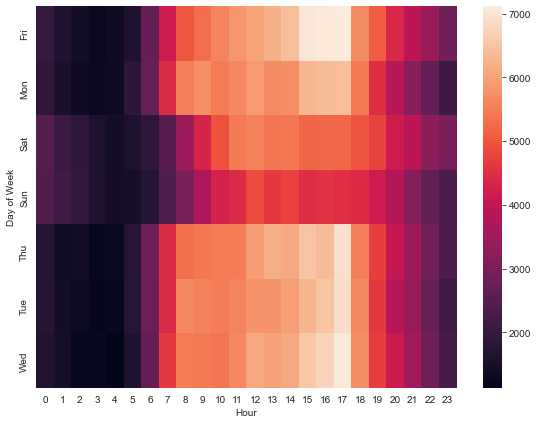

In [49]:
sns.heatmap(day_hour)

plt.tight_layout()

We see that most calls take place around the end of office hours on weekdays. We can create a clustermap to pair up similar Hours and Days.

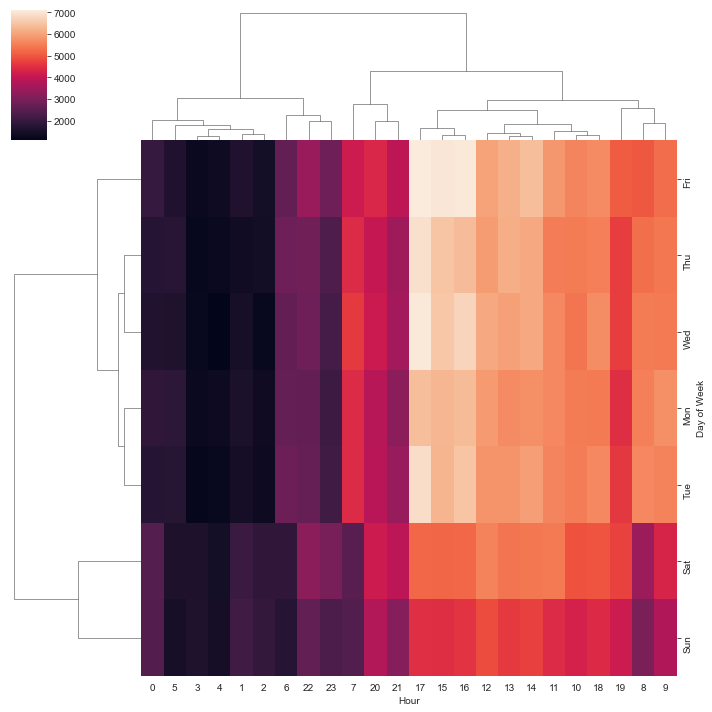

In [51]:
sns.clustermap(day_hour)